# Given Catchment extract some cross section profiles

In [1]:
import rioxarray
import geopandas as gpd
import pandas as pd
import numpy as np
import xrspatial
from shapely import Point, LineString, Polygon
import matplotlib.pyplot as plt

from valleys.cross_section import plot_cross_section_profile, map_cross_sections, preprocess_channel, get_cross_section_points

In [2]:
dem = rioxarray.open_rasterio("../toy_data/11_dem.tif").squeeze()
hand = rioxarray.open_rasterio("../toy_data/11_hand.tif").squeeze()
curv = rioxarray.open_rasterio("../toy_data/11_profile_curvature.tif").squeeze()
flowline = gpd.read_file("../toy_data/11_streamline.shp")
stream_raster = rioxarray.open_rasterio("../toy_data/11_stream.tif").squeeze()

hand = hand.where(hand != -32768, np.nan)
stream_raster = stream_raster.where(stream_raster != -32768, np.nan)

slope = xrspatial.slope(hand)

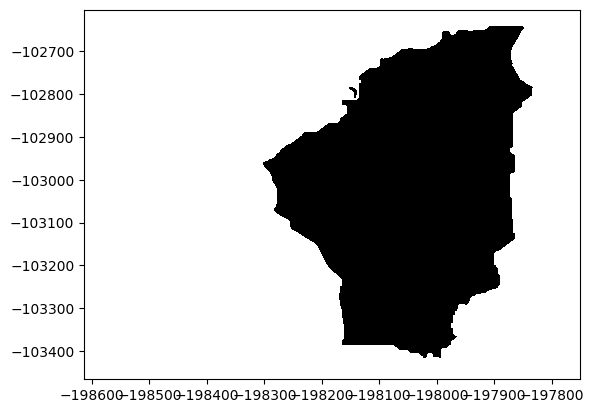

In [3]:
centerline = preprocess_channel(flowline['geometry'][0], method='centerline', hand=hand, contour_levels = [0,3,5,10,100])

In [4]:
points_df = get_cross_section_points(centerline, hand, curv, xs_spacing=10, xs_width=200, xs_point_spacing=5)
points_df

,alpha,elevation,slope,point,cross_section
0,-200,78.727640,0.000812,POINT (-198234.80922341425 -103061.88927002312),0
1,-195,76.142427,0.049048,POINT (-198231.82133413237 -103057.88021556611),0
2,-190,72.625315,0.035806,POINT (-198228.83344485052 -103053.8711611091),0
3,-185,66.677134,0.004668,POINT (-198225.84555556864 -103049.86210665209),0
4,-180,61.914576,-0.007746,POINT (-198222.85766628679 -103045.85305219507),0
...,...,...,...,...,...
77,180,NaN,0.000000,POINT (-197860.99503705103 -103450.08209762827),50
78,185,NaN,0.000000,POINT (-197856.65282620548 -103452.56105002246),50
79,190,NaN,0.000000,POINT (-197852.3106153599 -103455.04000241664),50
80,195,NaN,0.000000,POINT (-197847.96840451434 -103457.51895481083),50


<Axes: >

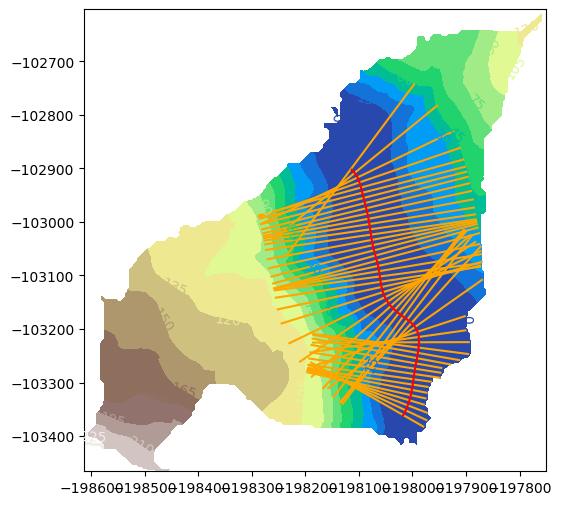

In [5]:
map_cross_sections(points_df, hand, centerline)

<Axes: >

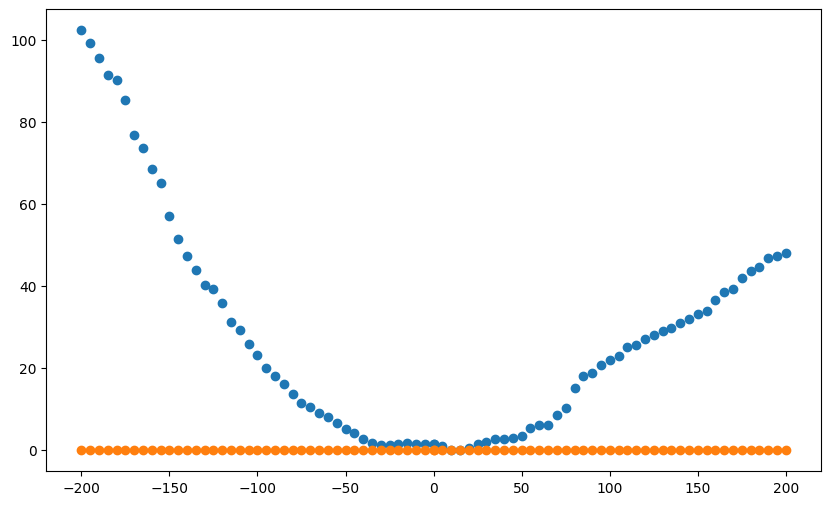

In [6]:
plot_cross_section_profile(points_df.loc[points_df['cross_section'] == 15])

In [7]:
points_df.to_csv("../toy_data/11_cross_sections.csv")